<a href="https://colab.research.google.com/github/rsaran-BioAI/AGILE/blob/main/SMILES_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.4 MB/s eta 0:00:00


## Reading, Drawing, and Analyzing a Molecule

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

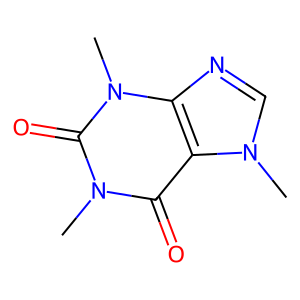

In [ ]:
# define the smiles string and covert it into a molecule sturcture
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# draw the modecule and display in colab notebook
mol_image = Draw.MolToImage(mol)
display(mol_image)

In [ ]:
# Save the image if needed
mol_image.save('caffeine.png')

In [ ]:
from google.colab import files
files.download('caffeine.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

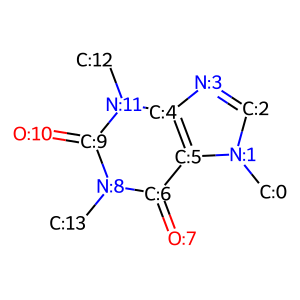

In [ ]:
# draw the molecule with property
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))

Draw.MolToImage(mol)

In [ ]:
# Save the image if needed
mol_image.save('caffeine_with_prop.png')

In [ ]:
from google.colab import files
files.download('caffeine_with_prop.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# print the atoms of the molecule
for atom in mol.GetAtoms():
    print(atom.GetIdx(),',',
          atom.GetAtomicNum(),',',
          atom.GetIsAromatic(),',',
          atom.GetSymbol())

# print the bonds of the molecule
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

0 , 6 , False , C
1 , 7 , True , N
2 , 6 , True , C
3 , 7 , True , N
4 , 6 , True , C
5 , 6 , True , C
6 , 6 , True , C
7 , 8 , False , O
8 , 7 , True , N
9 , 6 , True , C
10 , 8 , False , O
11 , 7 , True , N
12 , 6 , False , C
13 , 6 , False , C
0 , 1 , SINGLE
1 , 2 , AROMATIC
2 , 3 , AROMATIC
3 , 4 , AROMATIC
4 , 5 , AROMATIC
5 , 6 , AROMATIC
6 , 7 , DOUBLE
6 , 8 , AROMATIC
8 , 9 , AROMATIC
9 , 10 , DOUBLE
9 , 11 , AROMATIC
11 , 12 , SINGLE
8 , 13 , SINGLE
5 , 1 , AROMATIC
11 , 4 , AROMATIC


## Generating Molecular Fingerprint from a SMILES String

In [ ]:
from rdkit.Chem import RDKFingerprint
from rdkit.Chem import rdMolDescriptors

In [ ]:
# import numpy for data type conversion
import numpy as np

In [ ]:
# define the smiles string and covert it into a molecule sturcture
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

In [ ]:
# retrieving RDK Fingerprint
fingerprint_rdk = RDKFingerprint(mol)
print(">>> RDK Fingerprint = ", fingerprint_rdk)

fingerprint_rdk_np = np.array(fingerprint_rdk)
print(">>> RDK Fingerprint in numpy = ", fingerprint_rdk_np)
print(">>> RDK Fingerprint in numpy shape = ", fingerprint_rdk_np.shape)

print()

>>> RDK Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7acbc05385f0>
>>> RDK Fingerprint in numpy =  [1 1 0 ... 0 0 1]
>>> RDK Fingerprint in numpy shape =  (2048,)



In [ ]:
import torch

# Assuming `mol` is your molecule object from RDKit
fingerprint_rdk = RDKFingerprint(mol)

# Convert the RDKit fingerprint to a NumPy array
# RDKit fingerprints are bit vectors, and we can convert them to a NumPy array by calling `ToList`
# and then convert that list to a NumPy array.
fingerprint_rdk_np = np.array(fingerprint_rdk.ToList())

print(">>> RDK Fingerprint in numpy = ", fingerprint_rdk_np)
print(">>> RDK Fingerprint in numpy shape = ", fingerprint_rdk_np.shape)

# Convert the NumPy array to a PyTorch tensor
fingerprint_rdk_tensor = torch.tensor(fingerprint_rdk_np).int()

print(">>> RDK Fingerprint as a PyTorch Tensor = ", fingerprint_rdk_tensor)
print(">>> RDK Fingerprint PyTorch Tensor shape = ", fingerprint_rdk_tensor.shape)


>>> RDK Fingerprint in numpy =  [1 1 0 ... 0 0 1]
>>> RDK Fingerprint in numpy shape =  (2048,)
>>> RDK Fingerprint as a PyTorch Tensor =  tensor([1, 1, 0,  ..., 0, 0, 1], dtype=torch.int32)
>>> RDK Fingerprint PyTorch Tensor shape =  torch.Size([2048])


In [ ]:
# Assuming fingerprint_rdk_tensor is your tensor
is_binary = torch.all((fingerprint_rdk_tensor == 0) | (fingerprint_rdk_tensor == 1))

print(f"All elements are 0 or 1: {is_binary.item()}")

All elements are 0 or 1: True


In [ ]:
unique_values = torch.unique(fingerprint_rdk_tensor)
print(f"Unique values in the tensor: {unique_values}")

Unique values in the tensor: tensor([0, 1], dtype=torch.int32)


In [ ]:
# retrieving Morgan Fingerprint
fingerprint_morgan = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2)
print(">>> Morgan Fingerprint = ", fingerprint_morgan)

fingerprint_morgan_np = np.array(fingerprint_morgan.ToList())
print(">>> Morgan Fingerprint in numpy : ", fingerprint_morgan_np)
print(">>> Morgan Fingerprint in numpy shape = ", fingerprint_morgan_np.shape)

# Convert the NumPy array to a PyTorch tensor
fingerprint_morgan_tensor = torch.tensor(fingerprint_morgan_np).int()

print(">>> Morgan Fingerprint as a PyTorch Tensor = ", fingerprint_morgan_tensor)
print(">>> Morgan Fingerprint PyTorch Tensor shape = ", fingerprint_morgan_tensor.shape)

>>> Morgan Fingerprint =  <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7acb1e8c0970>
>>> Morgan Fingerprint in numpy :  [0 0 0 ... 0 0 0]
>>> Morgan Fingerprint in numpy shape =  (2048,)
>>> Morgan Fingerprint as a PyTorch Tensor =  tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.int32)
>>> Morgan Fingerprint PyTorch Tensor shape =  torch.Size([2048])


In [ ]:
# Assuming fingerprint_rdk_tensor is your tensor
is_binary = torch.all((fingerprint_morgan_tensor == 0) | (fingerprint_morgan_tensor == 1))

print(f"All elements are 0 or 1: {is_binary.item()}")

All elements are 0 or 1: True


In [ ]:
unique_values = torch.unique(fingerprint_morgan_tensor)
print(f"Unique values in the tensor: {unique_values}")

Unique values in the tensor: tensor([0, 1], dtype=torch.int32)


## Generating One-Hot Encoding from a SMILES *string*

In [ ]:
# define SMILES characters
SMILES_CHARS = [' ',
                '#', '%', '(', ')', '+', '-', '.', '/',
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                '=', '@',
                'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
                'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']',
                'a', 'b', 'c', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's',
                't', 'u']

In [ ]:
# define encoder and decoder
smi2index = dict( (c,i) for i,c in enumerate( SMILES_CHARS ) )
index2smi = dict( (i,c) for i,c in enumerate( SMILES_CHARS ) )

def smiles_encoder( smiles, maxlen=120 ):
    X = np.zeros( ( maxlen, len( SMILES_CHARS ) ) )
    for i, c in enumerate( smiles ):
        X[i, smi2index[c] ] = 1
    return X
    print(X)

def smiles_decoder( X ):
    smi = ''
    X = X.argmax( axis=-1 )
    for i in X:
        smi += index2smi[ i ]
    return smi
    print(smi)

In [ ]:
# get a taste of caffeine
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

caffeine_encoding = smiles_encoder(caffeine_smiles)

print(caffeine_encoding.shape) # (120, 56)
print(caffeine_encoding)

one_tensor = torch.tensor(caffeine_encoding).float()

print(one_tensor)
print(one_tensor.shape)

(120, 56)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([120, 56])


In [ ]:
unique_values = torch.unique(one_tensor)
print(f"Unique values in the tensor: {unique_values}")

Unique values in the tensor: tensor([0., 1.])


In [ ]:
one_tensor = torch.tensor(caffeine_encoding).int()

print(one_tensor)
print(one_tensor.shape)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)
torch.Size([120, 56])
